In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2/5/2010,24924.50,False
1,1,1,2/12/2010,46039.49,True
2,1,1,2/19/2010,41595.55,False
3,1,1,2/26/2010,19403.54,False
4,1,1,3/5/2010,21827.90,False


In [4]:
strp = datetime.datetime.strptime

In [5]:
train['Date'] = train['Date'].apply(lambda x : pd.to_datetime(x))

In [6]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [8]:
features = pd.read_csv('features.csv')

In [9]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [10]:
features['Date'] = features['Date'].apply(lambda x: pd.to_datetime(x))

In [11]:
stores = pd.read_csv('stores.csv')

In [12]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [13]:
merged_features_stores = pd.merge(features, stores, on='Store', how='outer')

merged_features_stores

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221


In [14]:
merged_features_stores[(merged_features_stores['Store']==45) & (merged_features_stores['Date']=='2013-07-19')]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.0,1059.46,NaN,NaN,False,B,118221


In [15]:
merged_features_stores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
 12  Type          8190 non-null   object        
 13  Size          8190 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 903.8+ KB


In [16]:
import missingno as msno

<AxesSubplot:>

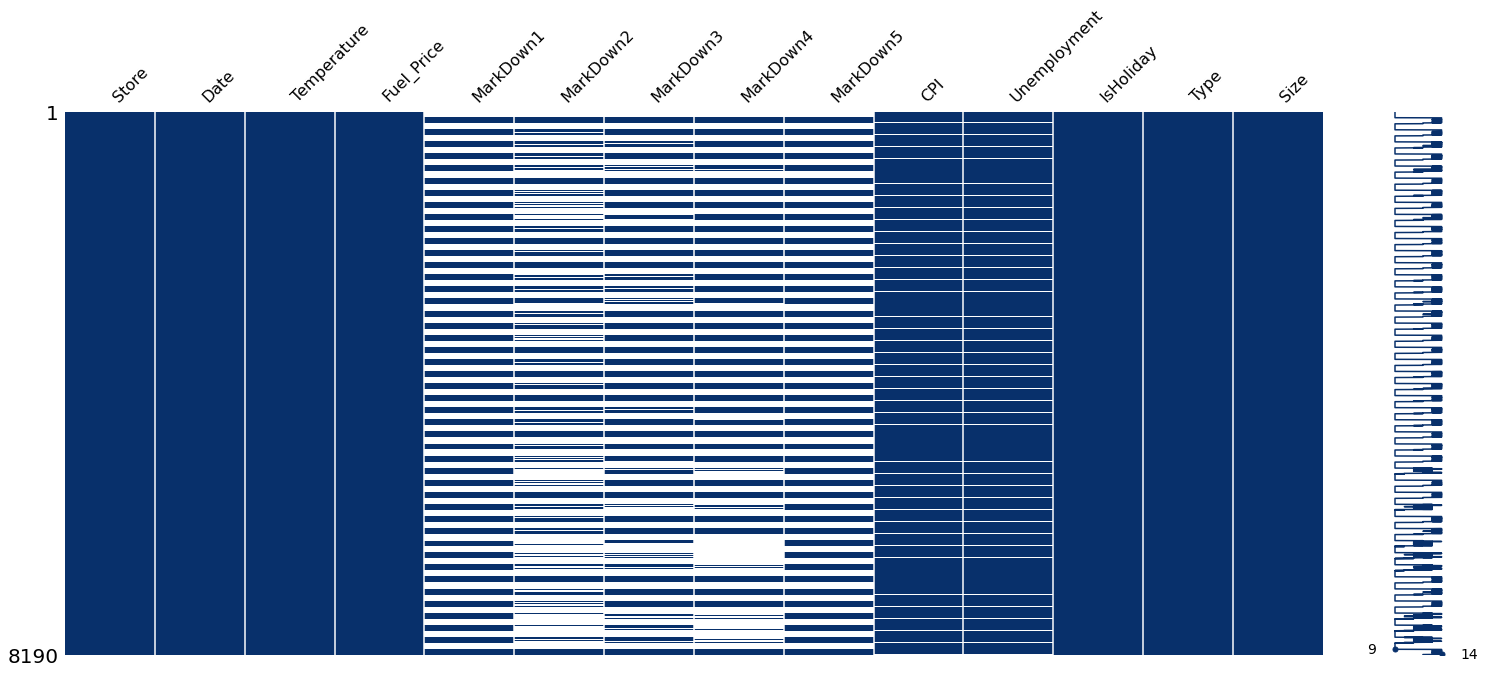

In [17]:
msno.matrix(merged_features_stores, color=(8/255, 48/255, 107/255))

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [19]:
merged_all = pd.merge(train, merged_features_stores, on=["Date", "Store"], how="left")

In [20]:
merged_all_r = pd.merge(train, merged_features_stores, on=["Date", "Store"], how="right")

In [21]:
merged_all_l = pd.merge(train, merged_features_stores, on=["Date", "Store"], how="left")

In [22]:
train[(train['Store']==45) & (train['Date']>'2013-01-19')]

,Store,Dept,Date,Weekly_Sales,IsHoliday


In [37]:
train[train['Date']>'2012-01-01']

,Store,Dept,Date,Weekly_Sales,IsHoliday
100,1,1,2012-01-06,16567.69,False
101,1,1,2012-01-13,16894.40,False
102,1,1,2012-01-20,18365.10,False
103,1,1,2012-01-27,18378.16,False
104,1,1,2012-02-03,23510.49,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [35]:
merged_features_stores[merged_features_stores['Date']>'2013-01-01']

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
152,1,2013-01-04,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,False,A,151315
153,1,2013-01-11,50.32,3.243,6520.24,16134.60,12.17,774.55,4001.25,224.201552,6.525,False,A,151315
154,1,2013-01-18,42.92,3.237,3772.69,3559.46,3.88,246.62,1900.40,224.235813,6.525,False,A,151315
155,1,2013-01-25,53.37,3.227,965.89,1097.91,0.10,225.36,1831.88,224.235552,6.525,False,A,151315
156,1,2013-02-01,56.46,3.244,9290.91,1359.90,265.00,20657.82,972.61,224.235290,6.525,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221


In [23]:
merged_all[(merged_all['Store']==45) & (merged_all['Date']>'2013-01-19')]

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size


In [24]:
merged_all[merged_all['Store'] == 45]

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
411933,45,1,2010-02-05,18628.11,False,27.31,2.784,NaN,NaN,NaN,NaN,NaN,181.871190,8.992,False,B,118221
411934,45,1,2010-02-12,22416.94,True,27.73,2.773,NaN,NaN,NaN,NaN,NaN,181.982317,8.992,True,B,118221
411935,45,1,2010-02-19,28756.53,False,31.27,2.745,NaN,NaN,NaN,NaN,NaN,182.034782,8.992,False,B,118221
411936,45,1,2010-02-26,14656.08,False,34.89,2.754,NaN,NaN,NaN,NaN,NaN,182.077469,8.992,False,B,118221
411937,45,1,2010-03-05,16608.87,False,37.13,2.777,NaN,NaN,NaN,NaN,NaN,182.120157,8.992,False,B,118221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,B,118221


In [25]:
merged_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
 15  Type          421

In [26]:
merged_all_l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
 15  Type          421

In [27]:
merged_all_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423325 entries, 0 to 423324
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         423325 non-null  int64         
 1   Dept          421570 non-null  float64       
 2   Date          423325 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  object        
 5   Temperature   423325 non-null  float64       
 6   Fuel_Price    423325 non-null  float64       
 7   MarkDown1     152433 non-null  float64       
 8   MarkDown2     112532 non-null  float64       
 9   MarkDown3     138658 non-null  float64       
 10  MarkDown4     136466 non-null  float64       
 11  MarkDown5     153187 non-null  float64       
 12  CPI           422740 non-null  float64       
 13  Unemployment  422740 non-null  float64       
 14  IsHoliday_y   423325 non-null  bool          
 15  Type          423

In [28]:
merged_all.iloc[400000:4200000,:]

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
400000,43,16,2011-06-17,3230.12,False,88.49,3.637,NaN,NaN,NaN,NaN,NaN,206.856024,10.581,False,C,41062
400001,43,16,2011-06-24,4209.41,False,88.30,3.594,NaN,NaN,NaN,NaN,NaN,206.942441,10.581,False,C,41062
400002,43,16,2011-07-01,2733.67,False,91.36,3.524,NaN,NaN,NaN,NaN,NaN,207.028857,10.641,False,C,41062
400003,43,16,2011-07-08,5347.33,False,87.02,3.480,NaN,NaN,NaN,NaN,NaN,207.115274,10.641,False,C,41062
400004,43,16,2011-07-15,2716.68,False,84.67,3.575,NaN,NaN,NaN,NaN,NaN,207.194069,10.641,False,C,41062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,B,118221


In [29]:
import missingno as msno

<AxesSubplot:>

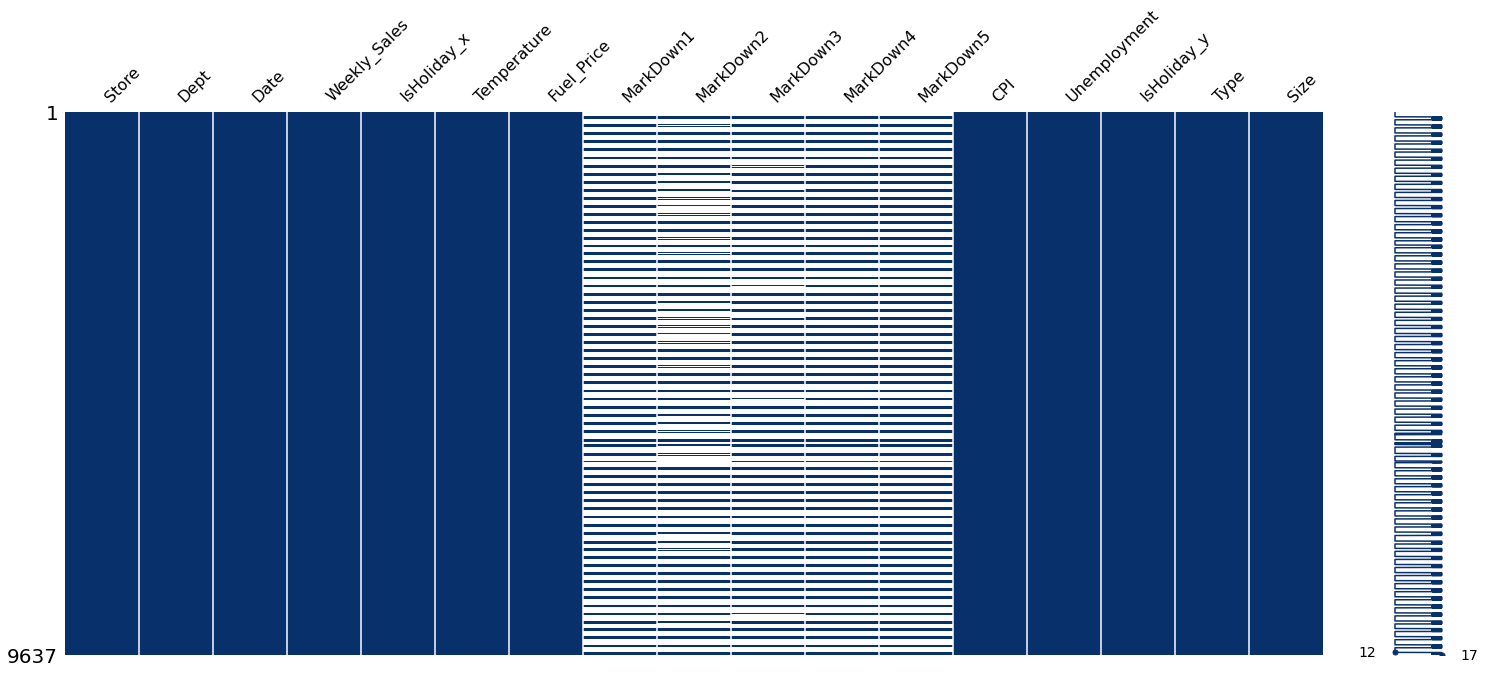

In [30]:
msno.matrix(merged_all[merged_all['Store']==45], color=(8/255, 48/255, 107/255))

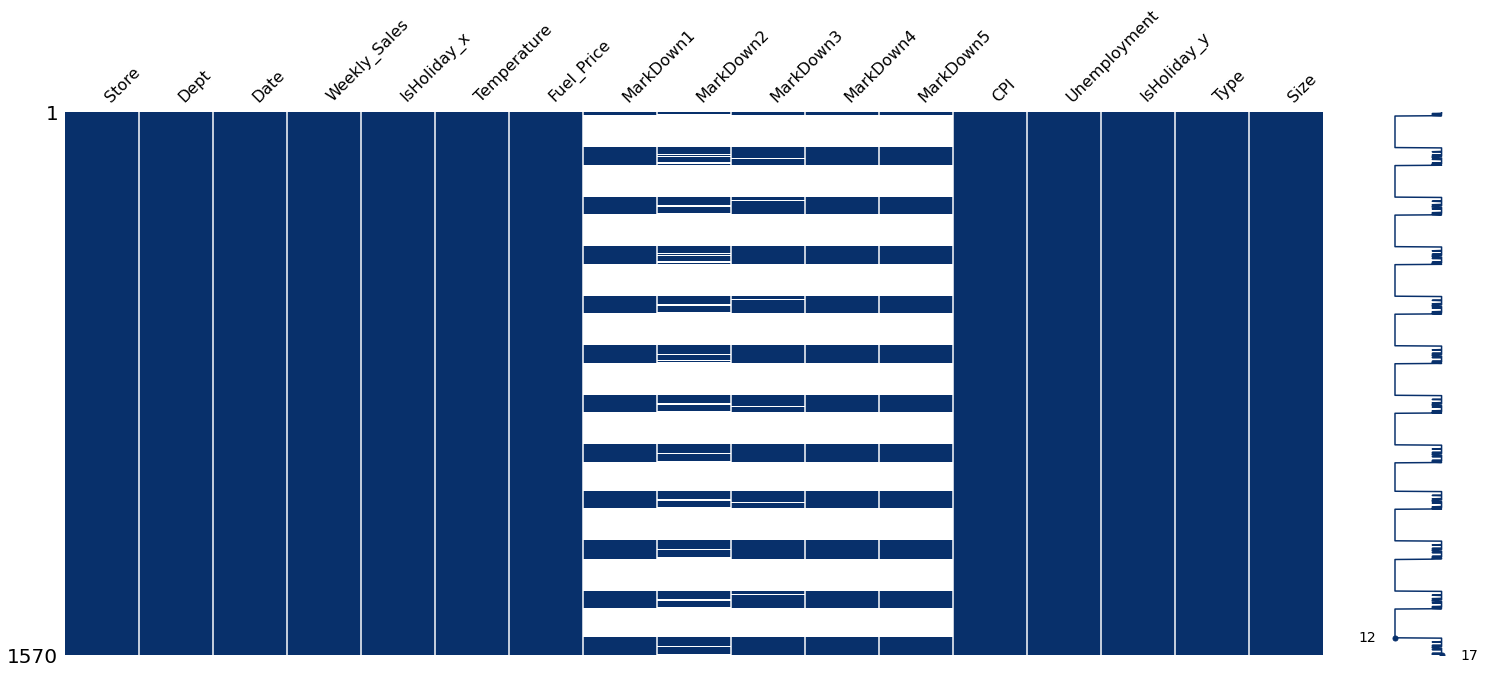

In [31]:
bla = msno.matrix(merged_all.iloc[420000:4300000,:], color=(8/255, 48/255, 107/255))

In [32]:
merged.head()

NameError: name 'merged' is not defined

In [ ]:
for col in ['MarkDown1','MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']:
    filled[col] = merged[col].apply(lambda x: np.isnan(x))


In [ ]:
merged.info()

In [ ]:
merged.describe()

In [ ]:
store_stats = features.groupby('Store').mean()
store_stats = store_stats.reset_index()
store_stats.head()

In [ ]:
import sklearn

In [ ]:
sklearn.__version__

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(store_stats)
store_stats_normd = scaler.transform(store_stats)
store_stats_normd = pd.DataFrame(store_stats_normd, columns=store_stats.columns)

In [ ]:
store_stats_normd.head()

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(25,15))
sns.boxplot(ax=ax[0], data=features, x='Store', y='CPI')
sns.boxplot(ax=ax[1], data=features, x='Store', y='Unemployment')
sns.violinplot(ax=ax[2], data=features, x='Store', y='Temperature')
ax[0].set_ylabel(ylabel ='CPI', fontsize=30)
ax[1].set_ylabel(ylabel ='Unemployment', fontsize=30)
ax[2].set_ylabel(ylabel ='Temperature', fontsize=30)

In [ ]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18,5)
ax.set_xlabel('Bla')
sns.heatmap(store_stats_normd)
ax1 = fig.gca()
ax1.set_ylabel('Store', fontsize=15)


In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(merged.notnull(), cbar=False, cmap='Blues')
fig.align_labels()
ax.set(yticks=[1,8190])
ax.set(yticklabels=[1,8190])
ax.tick_params(axis='x', labelrotation=45, labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.grid(which='major',  drawstyle='steps')
type(ax)


In [ ]:
filled

In [ ]:
merged['MarkDown1'] = merged['MarkDown1'].apply(lambda x: np.isnan(x))

In [ ]:
merged.head()

In [ ]:
msno.matrix(cleaned)

In [ ]:
bla = cleaned[cleaned['CPI'].isnull()]
bla